#  Customer Churn Prediction for Subscription Services

## Problem Definition: Customer Churn Prediction

### What is customer churn?

#### Customer churn refers to the process by which clients stop using a company's product or service. It is measured as a percentage and is a crucial indicator of business health.

#### Why is customer churn important for businesses?

#### 1.Financial Losses: Retaining customers is cheaper than acquiring new ones. A mere 5% increase in retention can lead to a 25-95% increase in profits.

#### 2.Company Image: High churn rates can negatively affect a company's reputation, reducing trust from potential customers.

#### 3.Increased Marketing Costs: Companies spend more to attract new customers, leading to higher operational expenses.

#### 4.Loss of Insights: Departing customers may provide valuable feedback about product shortcomings, which shou>ld be considered for improvements.

#### Conclusion

#### Using machine learning to predict customer churn allows companies to proactively identify at-risk groups and develop retention strategies, ultimately enhancing financial performance and strengthening customer relationships.#### Using machine learning to predict customer churn allows companies to proactively identify at-risk groups and develop retention strategies, ultimately enhancing financial performance and strengthening customer relationships.

### Introduction

### Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. Click the blue "Edit Notebook" or "Fork Notebook" button at the top of this kernel to begin editing.



### Exploratory Analysis


#### To begin this exploratory analysis, first use matplotlib to import libraries and define functions for plotting the data. Depending on the data, not all plots will be made. (Hey, I'm just a kerneling bot, not a Kaggle Competitions Grandmaster!)

#### Summary of project:

##### 1.Import libraries.
##### 2. Load the dataset.
##### 3.Explore the dataset.
##### 4.Preprocess the data (handle missing values, encode categorical features, scale numerical features).
##### 5.Split the data into training and testing sets.
##### 6.Build a basic Logistic Regression model.
##### 7.Evaluate model performance with accuracy, confusion matrix, and classification report.
##### 8.Optionally, improve the model by trying other algorithms.

### Step 1: Import Necessary Libraries

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### Step 2: Load the Dataset

In [304]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [305]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Step 3: Explore the Data (EDA)

In [307]:
#check the missing values
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [308]:
#check basic information about the datasets
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [309]:
#chake the distribution of the target variable'churn'
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


<Axes: xlabel='Churn', ylabel='count'>

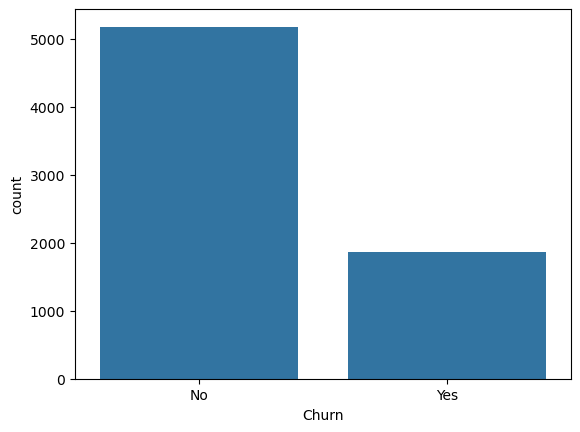

In [310]:
sns.countplot(data=df,x='Churn')

### Step 4: Data Preprocessing

#### 1.Handle missing values.
#### 2.Convert categorical features into numerical.
#### 3.Standardize numerical features.

##### handle missing values

In [314]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [315]:
df.fillna(df.mode(),inplace=True) 

#### Encode categorical values

In [317]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [318]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [319]:
#encode categorical columns(like gender ,contract types)
label_encoder=LabelEncoder()

In [320]:
df['gender']=label_encoder.fit_transform(df['gender'])

In [321]:
df['Partner']=label_encoder.fit_transform(df['Partner'])

In [322]:
df['Dependents']=label_encoder.fit_transform(df['Dependents'])

In [323]:
df['PhoneService']=label_encoder.fit_transform(df['PhoneService'])

In [324]:
df['MultipleLines']=label_encoder.fit_transform(df['PhoneService'])

####  Standardize Numerical Features

In [326]:
# Display the columns and their data types
print(df.dtypes)


customerID           object
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int64
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [327]:
# Use pd.get_dummies to convert categorical variables into dummy/indicator variables
df_encoded = pd.get_dummies(df, drop_first=True)  # drop_first to avoid dummy variable trap

# Now you can check the new DataFrame
print(df_encoded.head())


   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  MonthlyCharges  TotalCharges  customerID_0003-MKNFE  ...  \
0              0           29.85         29.85                  False  ...   
1              1           56.95       1889.50                  False  ...   
2              1           53.85        108.15                  False  ...   
3              0           42.30       1840.75                  False  ...   
4              1           70.70        151.65                  False  ...   

   StreamingTV_Yes  StreamingMovies_No internet service  StreamingMovies_Yes  \
0            False      

In [333]:
x=df.drop(['customerID','Churn'],axis=1)#feature
y=df['Churn'].apply(lambda x:1 if x=='yes' else 0)
scaler=StandardScaler()
x_scailed = scaler.fit_transform(x)

ValueError: could not convert string to float: 'DSL'

### split data into train and testing sits

In [337]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)


NameError: name 'x_scaled' is not defined